In [1]:
!pip install pyarrow mrjob

In [2]:
%%file solution.py

from mrjob.job import MRJob
from mrjob.step import MRStep

class MRLinesCount(MRJob):
    def steps(self):
        return [
            MRStep(
                mapper=self.mapper,
                combiner=self.combiner,
                reducer=self.reducer1,
            ),
            MRStep(reducer=self.reducer2)
        ]

    def mapper(self, _, line):
        splitted = line.split('\" \"')
        character = splitted[1]

        yield (character, 1)

    def combiner(self, character, counts):
        yield (character, sum(counts))

    def reducer1(self, character, count):
        yield None, (sum(count), character)

    def reducer2(self, _, cnt_character):
        for cnt, character in sorted(cnt_character, reverse=True)[:20]:
            yield character, cnt
        
if __name__ == "__main__":
    MRLinesCount.run()

Overwriting solution.py


# Проверяем локально

In [3]:
!python3 solution.py ../SW_EpisodeIV.txt
!python3 solution.py ../SW_EpisodeV.txt
!python3 solution.py ../SW_EpisodeVI.txt
!python3 solution.py ../SW_EpisodeIV.txt ../SW_EpisodeV.txt ../SW_EpisodeVI.txt

No configs found; falling back on auto-configuration
No configs specified for inline runner
Creating temp directory /tmp/solution.root.20231128.150008.190451
Running step 1 of 2...
Running step 2 of 2...
job output is in /tmp/solution.root.20231128.150008.190451/output
Streaming final output from /tmp/solution.root.20231128.150008.190451/output...
"LUKE"	254
"HAN"	153
"THREEPIO"	119
"BEN"	82
"LEIA"	57
"VADER"	41
"RED LEADER"	37
"BIGGS"	34
"TARKIN"	28
"OWEN"	25
"TROOPER"	19
"WEDGE"	14
"GOLD LEADER"	14
"OFFICER"	11
"RED TEN"	8
"GOLD FIVE"	7
"JABBA"	6
"INTERCOM VOICE"	6
"GREEDO"	6
"FIRST TROOPER"	6
Removing temp directory /tmp/solution.root.20231128.150008.190451...
No configs found; falling back on auto-configuration
No configs specified for inline runner
Creating temp directory /tmp/solution.root.20231128.150008.767759
Running step 1 of 2...
Running step 2 of 2...
job output is in /tmp/solution.root.20231128.150008.767759/output
Streaming final output from /tmp/solution.root.20231128.15

# Проверяем на кластере

!python3 solution.py -r hadoop hdfs://namenode:8020/SW_EpisodeIV.txt hdfs://namenode:8020/SW_EpisodeV.txt hdfs://namenode:8020/SW_EpisodeVI.txt

# Строим гистограммы

In [4]:
!pip install matplotlib

In [5]:
import os
from pyarrow import fs
from matplotlib import pyplot as plt

os.environ['CLASSPATH'] = '/opt/hadoop/etc/hadoop:/opt/hadoop/share/hadoop/common/lib/zookeeper-3.6.3.jar:/opt/hadoop/share/hadoop/common/lib/guava-27.0-jre.jar:/opt/hadoop/share/hadoop/common/lib/curator-recipes-5.2.0.jar:/opt/hadoop/share/hadoop/common/lib/dnsjava-2.1.7.jar:/opt/hadoop/share/hadoop/common/lib/listenablefuture-9999.0-empty-to-avoid-conflict-with-guava.jar:/opt/hadoop/share/hadoop/common/lib/kerb-simplekdc-1.0.1.jar:/opt/hadoop/share/hadoop/common/lib/netty-buffer-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/jackson-core-2.12.7.jar:/opt/hadoop/share/hadoop/common/lib/zookeeper-jute-3.6.3.jar:/opt/hadoop/share/hadoop/common/lib/netty-transport-rxtx-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/kerb-crypto-1.0.1.jar:/opt/hadoop/share/hadoop/common/lib/netty-resolver-dns-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/kerb-admin-1.0.1.jar:/opt/hadoop/share/hadoop/common/lib/jul-to-slf4j-1.7.36.jar:/opt/hadoop/share/hadoop/common/lib/slf4j-reload4j-1.7.36.jar:/opt/hadoop/share/hadoop/common/lib/stax2-api-4.2.1.jar:/opt/hadoop/share/hadoop/common/lib/netty-all-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/snappy-java-1.1.8.2.jar:/opt/hadoop/share/hadoop/common/lib/commons-compress-1.21.jar:/opt/hadoop/share/hadoop/common/lib/audience-annotations-0.5.0.jar:/opt/hadoop/share/hadoop/common/lib/checker-qual-2.5.2.jar:/opt/hadoop/share/hadoop/common/lib/metrics-core-3.2.4.jar:/opt/hadoop/share/hadoop/common/lib/netty-handler-proxy-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/jsr311-api-1.1.1.jar:/opt/hadoop/share/hadoop/common/lib/netty-codec-memcache-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/netty-resolver-dns-native-macos-4.1.89.Final-osx-x86_64.jar:/opt/hadoop/share/hadoop/common/lib/kerb-server-1.0.1.jar:/opt/hadoop/share/hadoop/common/lib/jsch-0.1.55.jar:/opt/hadoop/share/hadoop/common/lib/jakarta.activation-api-1.2.1.jar:/opt/hadoop/share/hadoop/common/lib/commons-io-2.8.0.jar:/opt/hadoop/share/hadoop/common/lib/gson-2.9.0.jar:/opt/hadoop/share/hadoop/common/lib/hadoop-auth-3.3.6.jar:/opt/hadoop/share/hadoop/common/lib/jcip-annotations-1.0-1.jar:/opt/hadoop/share/hadoop/common/lib/jackson-annotations-2.12.7.jar:/opt/hadoop/share/hadoop/common/lib/jackson-mapper-asl-1.9.13.jar:/opt/hadoop/share/hadoop/common/lib/animal-sniffer-annotations-1.17.jar:/opt/hadoop/share/hadoop/common/lib/netty-handler-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/protobuf-java-2.5.0.jar:/opt/hadoop/share/hadoop/common/lib/netty-transport-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/commons-codec-1.15.jar:/opt/hadoop/share/hadoop/common/lib/jettison-1.5.4.jar:/opt/hadoop/share/hadoop/common/lib/jersey-json-1.20.jar:/opt/hadoop/share/hadoop/common/lib/jackson-core-asl-1.9.13.jar:/opt/hadoop/share/hadoop/common/lib/jetty-xml-9.4.51.v20230217.jar:/opt/hadoop/share/hadoop/common/lib/hadoop-annotations-3.3.6.jar:/opt/hadoop/share/hadoop/common/lib/netty-resolver-dns-native-macos-4.1.89.Final-osx-aarch_64.jar:/opt/hadoop/share/hadoop/common/lib/commons-math3-3.1.1.jar:/opt/hadoop/share/hadoop/common/lib/netty-transport-sctp-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/kerby-xdr-1.0.1.jar:/opt/hadoop/share/hadoop/common/lib/netty-resolver-dns-classes-macos-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/commons-beanutils-1.9.4.jar:/opt/hadoop/share/hadoop/common/lib/netty-transport-udt-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/javax.servlet-api-3.1.0.jar:/opt/hadoop/share/hadoop/common/lib/netty-transport-native-epoll-4.1.89.Final-linux-x86_64.jar:/opt/hadoop/share/hadoop/common/lib/jetty-server-9.4.51.v20230217.jar:/opt/hadoop/share/hadoop/common/lib/commons-collections-3.2.2.jar:/opt/hadoop/share/hadoop/common/lib/re2j-1.1.jar:/opt/hadoop/share/hadoop/common/lib/jsp-api-2.1.jar:/opt/hadoop/share/hadoop/common/lib/commons-text-1.10.0.jar:/opt/hadoop/share/hadoop/common/lib/netty-codec-smtp-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/netty-transport-native-unix-common-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/netty-transport-classes-kqueue-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/commons-net-3.9.0.jar:/opt/hadoop/share/hadoop/common/lib/token-provider-1.0.1.jar:/opt/hadoop/share/hadoop/common/lib/avro-1.7.7.jar:/opt/hadoop/share/hadoop/common/lib/httpcore-4.4.13.jar:/opt/hadoop/share/hadoop/common/lib/kerby-util-1.0.1.jar:/opt/hadoop/share/hadoop/common/lib/jersey-core-1.19.4.jar:/opt/hadoop/share/hadoop/common/lib/slf4j-api-1.7.36.jar:/opt/hadoop/share/hadoop/common/lib/commons-configuration2-2.8.0.jar:/opt/hadoop/share/hadoop/common/lib/paranamer-2.3.jar:/opt/hadoop/share/hadoop/common/lib/netty-resolver-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/jetty-util-ajax-9.4.51.v20230217.jar:/opt/hadoop/share/hadoop/common/lib/kerb-client-1.0.1.jar:/opt/hadoop/share/hadoop/common/lib/curator-client-5.2.0.jar:/opt/hadoop/share/hadoop/common/lib/netty-codec-socks-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/jetty-security-9.4.51.v20230217.jar:/opt/hadoop/share/hadoop/common/lib/jetty-util-9.4.51.v20230217.jar:/opt/hadoop/share/hadoop/common/lib/commons-cli-1.2.jar:/opt/hadoop/share/hadoop/common/lib/hadoop-shaded-protobuf_3_7-1.1.1.jar:/opt/hadoop/share/hadoop/common/lib/httpclient-4.5.13.jar:/opt/hadoop/share/hadoop/common/lib/netty-codec-dns-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/netty-transport-native-epoll-4.1.89.Final-linux-aarch_64.jar:/opt/hadoop/share/hadoop/common/lib/curator-framework-5.2.0.jar:/opt/hadoop/share/hadoop/common/lib/netty-transport-native-kqueue-4.1.89.Final-osx-aarch_64.jar:/opt/hadoop/share/hadoop/common/lib/hadoop-shaded-guava-1.1.1.jar:/opt/hadoop/share/hadoop/common/lib/jetty-http-9.4.51.v20230217.jar:/opt/hadoop/share/hadoop/common/lib/netty-codec-haproxy-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/netty-handler-ssl-ocsp-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/jersey-servlet-1.19.4.jar:/opt/hadoop/share/hadoop/common/lib/kerby-pkix-1.0.1.jar:/opt/hadoop/share/hadoop/common/lib/jaxb-impl-2.2.3-1.jar:/opt/hadoop/share/hadoop/common/lib/jersey-server-1.19.4.jar:/opt/hadoop/share/hadoop/common/lib/netty-codec-http-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/kerb-core-1.0.1.jar:/opt/hadoop/share/hadoop/common/lib/netty-codec-http2-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/netty-transport-classes-epoll-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/jetty-io-9.4.51.v20230217.jar:/opt/hadoop/share/hadoop/common/lib/jetty-servlet-9.4.51.v20230217.jar:/opt/hadoop/share/hadoop/common/lib/failureaccess-1.0.jar:/opt/hadoop/share/hadoop/common/lib/jetty-webapp-9.4.51.v20230217.jar:/opt/hadoop/share/hadoop/common/lib/kerby-asn1-1.0.1.jar:/opt/hadoop/share/hadoop/common/lib/kerb-common-1.0.1.jar:/opt/hadoop/share/hadoop/common/lib/jsr305-3.0.2.jar:/opt/hadoop/share/hadoop/common/lib/j2objc-annotations-1.1.jar:/opt/hadoop/share/hadoop/common/lib/kerby-config-1.0.1.jar:/opt/hadoop/share/hadoop/common/lib/netty-codec-xml-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/netty-codec-mqtt-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/reload4j-1.2.22.jar:/opt/hadoop/share/hadoop/common/lib/netty-codec-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/woodstox-core-5.4.0.jar:/opt/hadoop/share/hadoop/common/lib/netty-codec-stomp-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/netty-common-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/kerb-util-1.0.1.jar:/opt/hadoop/share/hadoop/common/lib/jackson-databind-2.12.7.1.jar:/opt/hadoop/share/hadoop/common/lib/commons-lang3-3.12.0.jar:/opt/hadoop/share/hadoop/common/lib/commons-daemon-1.0.13.jar:/opt/hadoop/share/hadoop/common/lib/netty-codec-redis-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/jaxb-api-2.2.11.jar:/opt/hadoop/share/hadoop/common/lib/netty-transport-native-kqueue-4.1.89.Final-osx-x86_64.jar:/opt/hadoop/share/hadoop/common/lib/commons-logging-1.1.3.jar:/opt/hadoop/share/hadoop/common/lib/kerb-identity-1.0.1.jar:/opt/hadoop/share/hadoop/common/lib/nimbus-jose-jwt-9.8.1.jar:/opt/hadoop/share/hadoop/common/hadoop-registry-3.3.6.jar:/opt/hadoop/share/hadoop/common/hadoop-kms-3.3.6.jar:/opt/hadoop/share/hadoop/common/hadoop-nfs-3.3.6.jar:/opt/hadoop/share/hadoop/common/hadoop-common-3.3.6-tests.jar:/opt/hadoop/share/hadoop/common/hadoop-common-3.3.6.jar:/opt/hadoop/share/hadoop/hdfs:/opt/hadoop/share/hadoop/hdfs/lib/zookeeper-3.6.3.jar:/opt/hadoop/share/hadoop/hdfs/lib/guava-27.0-jre.jar:/opt/hadoop/share/hadoop/hdfs/lib/curator-recipes-5.2.0.jar:/opt/hadoop/share/hadoop/hdfs/lib/dnsjava-2.1.7.jar:/opt/hadoop/share/hadoop/hdfs/lib/listenablefuture-9999.0-empty-to-avoid-conflict-with-guava.jar:/opt/hadoop/share/hadoop/hdfs/lib/kerb-simplekdc-1.0.1.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-buffer-4.1.89.Final.jar:/opt/hadoop/share/hadoop/hdfs/lib/jackson-core-2.12.7.jar:/opt/hadoop/share/hadoop/hdfs/lib/zookeeper-jute-3.6.3.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-transport-rxtx-4.1.89.Final.jar:/opt/hadoop/share/hadoop/hdfs/lib/kerb-crypto-1.0.1.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-resolver-dns-4.1.89.Final.jar:/opt/hadoop/share/hadoop/hdfs/lib/kerb-admin-1.0.1.jar:/opt/hadoop/share/hadoop/hdfs/lib/stax2-api-4.2.1.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-all-4.1.89.Final.jar:/opt/hadoop/share/hadoop/hdfs/lib/snappy-java-1.1.8.2.jar:/opt/hadoop/share/hadoop/hdfs/lib/commons-compress-1.21.jar:/opt/hadoop/share/hadoop/hdfs/lib/audience-annotations-0.5.0.jar:/opt/hadoop/share/hadoop/hdfs/lib/checker-qual-2.5.2.jar:/opt/hadoop/share/hadoop/hdfs/lib/metrics-core-3.2.4.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-handler-proxy-4.1.89.Final.jar:/opt/hadoop/share/hadoop/hdfs/lib/jsr311-api-1.1.1.jar:/opt/hadoop/share/hadoop/hdfs/lib/kotlin-stdlib-1.4.10.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-codec-memcache-4.1.89.Final.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-resolver-dns-native-macos-4.1.89.Final-osx-x86_64.jar:/opt/hadoop/share/hadoop/hdfs/lib/kerb-server-1.0.1.jar:/opt/hadoop/share/hadoop/hdfs/lib/jsch-0.1.55.jar:/opt/hadoop/share/hadoop/hdfs/lib/jakarta.activation-api-1.2.1.jar:/opt/hadoop/share/hadoop/hdfs/lib/commons-io-2.8.0.jar:/opt/hadoop/share/hadoop/hdfs/lib/gson-2.9.0.jar:/opt/hadoop/share/hadoop/hdfs/lib/hadoop-auth-3.3.6.jar:/opt/hadoop/share/hadoop/hdfs/lib/jcip-annotations-1.0-1.jar:/opt/hadoop/share/hadoop/hdfs/lib/jackson-annotations-2.12.7.jar:/opt/hadoop/share/hadoop/hdfs/lib/jackson-mapper-asl-1.9.13.jar:/opt/hadoop/share/hadoop/hdfs/lib/animal-sniffer-annotations-1.17.jar:/opt/hadoop/share/hadoop/hdfs/lib/json-simple-1.1.1.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-handler-4.1.89.Final.jar:/opt/hadoop/share/hadoop/hdfs/lib/protobuf-java-2.5.0.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-transport-4.1.89.Final.jar:/opt/hadoop/share/hadoop/hdfs/lib/commons-codec-1.15.jar:/opt/hadoop/share/hadoop/hdfs/lib/jettison-1.5.4.jar:/opt/hadoop/share/hadoop/hdfs/lib/leveldbjni-all-1.8.jar:/opt/hadoop/share/hadoop/hdfs/lib/jersey-json-1.20.jar:/opt/hadoop/share/hadoop/hdfs/lib/jackson-core-asl-1.9.13.jar:/opt/hadoop/share/hadoop/hdfs/lib/jetty-xml-9.4.51.v20230217.jar:/opt/hadoop/share/hadoop/hdfs/lib/hadoop-annotations-3.3.6.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-resolver-dns-native-macos-4.1.89.Final-osx-aarch_64.jar:/opt/hadoop/share/hadoop/hdfs/lib/commons-math3-3.1.1.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-transport-sctp-4.1.89.Final.jar:/opt/hadoop/share/hadoop/hdfs/lib/kerby-xdr-1.0.1.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-resolver-dns-classes-macos-4.1.89.Final.jar:/opt/hadoop/share/hadoop/hdfs/lib/commons-beanutils-1.9.4.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-transport-udt-4.1.89.Final.jar:/opt/hadoop/share/hadoop/hdfs/lib/javax.servlet-api-3.1.0.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-transport-native-epoll-4.1.89.Final-linux-x86_64.jar:/opt/hadoop/share/hadoop/hdfs/lib/jetty-server-9.4.51.v20230217.jar:/opt/hadoop/share/hadoop/hdfs/lib/commons-collections-3.2.2.jar:/opt/hadoop/share/hadoop/hdfs/lib/re2j-1.1.jar:/opt/hadoop/share/hadoop/hdfs/lib/commons-text-1.10.0.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-codec-smtp-4.1.89.Final.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-transport-native-unix-common-4.1.89.Final.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-transport-classes-kqueue-4.1.89.Final.jar:/opt/hadoop/share/hadoop/hdfs/lib/commons-net-3.9.0.jar:/opt/hadoop/share/hadoop/hdfs/lib/token-provider-1.0.1.jar:/opt/hadoop/share/hadoop/hdfs/lib/avro-1.7.7.jar:/opt/hadoop/share/hadoop/hdfs/lib/kotlin-stdlib-common-1.4.10.jar:/opt/hadoop/share/hadoop/hdfs/lib/httpcore-4.4.13.jar:/opt/hadoop/share/hadoop/hdfs/lib/kerby-util-1.0.1.jar:/opt/hadoop/share/hadoop/hdfs/lib/jersey-core-1.19.4.jar:/opt/hadoop/share/hadoop/hdfs/lib/commons-configuration2-2.8.0.jar:/opt/hadoop/share/hadoop/hdfs/lib/paranamer-2.3.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-resolver-4.1.89.Final.jar:/opt/hadoop/share/hadoop/hdfs/lib/jetty-util-ajax-9.4.51.v20230217.jar:/opt/hadoop/share/hadoop/hdfs/lib/kerb-client-1.0.1.jar:/opt/hadoop/share/hadoop/hdfs/lib/curator-client-5.2.0.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-codec-socks-4.1.89.Final.jar:/opt/hadoop/share/hadoop/hdfs/lib/jetty-security-9.4.51.v20230217.jar:/opt/hadoop/share/hadoop/hdfs/lib/okhttp-4.9.3.jar:/opt/hadoop/share/hadoop/hdfs/lib/jetty-util-9.4.51.v20230217.jar:/opt/hadoop/share/hadoop/hdfs/lib/commons-cli-1.2.jar:/opt/hadoop/share/hadoop/hdfs/lib/hadoop-shaded-protobuf_3_7-1.1.1.jar:/opt/hadoop/share/hadoop/hdfs/lib/HikariCP-java7-2.4.12.jar:/opt/hadoop/share/hadoop/hdfs/lib/httpclient-4.5.13.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-codec-dns-4.1.89.Final.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-transport-native-epoll-4.1.89.Final-linux-aarch_64.jar:/opt/hadoop/share/hadoop/hdfs/lib/curator-framework-5.2.0.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-transport-native-kqueue-4.1.89.Final-osx-aarch_64.jar:/opt/hadoop/share/hadoop/hdfs/lib/hadoop-shaded-guava-1.1.1.jar:/opt/hadoop/share/hadoop/hdfs/lib/jetty-http-9.4.51.v20230217.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-codec-haproxy-4.1.89.Final.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-handler-ssl-ocsp-4.1.89.Final.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-3.10.6.Final.jar:/opt/hadoop/share/hadoop/hdfs/lib/jersey-servlet-1.19.4.jar:/opt/hadoop/share/hadoop/hdfs/lib/kerby-pkix-1.0.1.jar:/opt/hadoop/share/hadoop/hdfs/lib/jaxb-impl-2.2.3-1.jar:/opt/hadoop/share/hadoop/hdfs/lib/jersey-server-1.19.4.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-codec-http-4.1.89.Final.jar:/opt/hadoop/share/hadoop/hdfs/lib/kerb-core-1.0.1.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-codec-http2-4.1.89.Final.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-transport-classes-epoll-4.1.89.Final.jar:/opt/hadoop/share/hadoop/hdfs/lib/jetty-io-9.4.51.v20230217.jar:/opt/hadoop/share/hadoop/hdfs/lib/jetty-servlet-9.4.51.v20230217.jar:/opt/hadoop/share/hadoop/hdfs/lib/failureaccess-1.0.jar:/opt/hadoop/share/hadoop/hdfs/lib/jetty-webapp-9.4.51.v20230217.jar:/opt/hadoop/share/hadoop/hdfs/lib/kerby-asn1-1.0.1.jar:/opt/hadoop/share/hadoop/hdfs/lib/kerb-common-1.0.1.jar:/opt/hadoop/share/hadoop/hdfs/lib/jsr305-3.0.2.jar:/opt/hadoop/share/hadoop/hdfs/lib/j2objc-annotations-1.1.jar:/opt/hadoop/share/hadoop/hdfs/lib/kerby-config-1.0.1.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-codec-xml-4.1.89.Final.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-codec-mqtt-4.1.89.Final.jar:/opt/hadoop/share/hadoop/hdfs/lib/reload4j-1.2.22.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-codec-4.1.89.Final.jar:/opt/hadoop/share/hadoop/hdfs/lib/woodstox-core-5.4.0.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-codec-stomp-4.1.89.Final.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-common-4.1.89.Final.jar:/opt/hadoop/share/hadoop/hdfs/lib/kerb-util-1.0.1.jar:/opt/hadoop/share/hadoop/hdfs/lib/jackson-databind-2.12.7.1.jar:/opt/hadoop/share/hadoop/hdfs/lib/commons-lang3-3.12.0.jar:/opt/hadoop/share/hadoop/hdfs/lib/commons-daemon-1.0.13.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-codec-redis-4.1.89.Final.jar:/opt/hadoop/share/hadoop/hdfs/lib/jaxb-api-2.2.11.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-transport-native-kqueue-4.1.89.Final-osx-x86_64.jar:/opt/hadoop/share/hadoop/hdfs/lib/okio-2.8.0.jar:/opt/hadoop/share/hadoop/hdfs/lib/commons-logging-1.1.3.jar:/opt/hadoop/share/hadoop/hdfs/lib/kerb-identity-1.0.1.jar:/opt/hadoop/share/hadoop/hdfs/lib/nimbus-jose-jwt-9.8.1.jar:/opt/hadoop/share/hadoop/hdfs/hadoop-hdfs-client-3.3.6.jar:/opt/hadoop/share/hadoop/hdfs/hadoop-hdfs-3.3.6.jar:/opt/hadoop/share/hadoop/hdfs/hadoop-hdfs-native-client-3.3.6-tests.jar:/opt/hadoop/share/hadoop/hdfs/hadoop-hdfs-3.3.6-tests.jar:/opt/hadoop/share/hadoop/hdfs/hadoop-hdfs-nfs-3.3.6.jar:/opt/hadoop/share/hadoop/hdfs/hadoop-hdfs-client-3.3.6-tests.jar:/opt/hadoop/share/hadoop/hdfs/hadoop-hdfs-httpfs-3.3.6.jar:/opt/hadoop/share/hadoop/hdfs/hadoop-hdfs-rbf-3.3.6-tests.jar:/opt/hadoop/share/hadoop/hdfs/hadoop-hdfs-native-client-3.3.6.jar:/opt/hadoop/share/hadoop/hdfs/hadoop-hdfs-rbf-3.3.6.jar:/opt/hadoop/share/hadoop/mapreduce/hadoop-mapreduce-client-common-3.3.6.jar:/opt/hadoop/share/hadoop/mapreduce/hadoop-mapreduce-examples-3.3.6.jar:/opt/hadoop/share/hadoop/mapreduce/hadoop-mapreduce-client-hs-plugins-3.3.6.jar:/opt/hadoop/share/hadoop/mapreduce/hadoop-mapreduce-client-app-3.3.6.jar:/opt/hadoop/share/hadoop/mapreduce/hadoop-mapreduce-client-uploader-3.3.6.jar:/opt/hadoop/share/hadoop/mapreduce/hadoop-mapreduce-client-core-3.3.6.jar:/opt/hadoop/share/hadoop/mapreduce/hadoop-mapreduce-client-jobclient-3.3.6.jar:/opt/hadoop/share/hadoop/mapreduce/hadoop-mapreduce-client-nativetask-3.3.6.jar:/opt/hadoop/share/hadoop/mapreduce/hadoop-mapreduce-client-jobclient-3.3.6-tests.jar:/opt/hadoop/share/hadoop/mapreduce/hadoop-mapreduce-client-shuffle-3.3.6.jar:/opt/hadoop/share/hadoop/mapreduce/hadoop-mapreduce-client-hs-3.3.6.jar:/opt/hadoop/share/hadoop/yarn:/opt/hadoop/share/hadoop/yarn/lib/jetty-client-9.4.51.v20230217.jar:/opt/hadoop/share/hadoop/yarn/lib/jetty-annotations-9.4.51.v20230217.jar:/opt/hadoop/share/hadoop/yarn/lib/websocket-common-9.4.51.v20230217.jar:/opt/hadoop/share/hadoop/yarn/lib/objenesis-2.6.jar:/opt/hadoop/share/hadoop/yarn/lib/jline-3.9.0.jar:/opt/hadoop/share/hadoop/yarn/lib/jetty-jndi-9.4.51.v20230217.jar:/opt/hadoop/share/hadoop/yarn/lib/jersey-client-1.19.4.jar:/opt/hadoop/share/hadoop/yarn/lib/javax.inject-1.jar:/opt/hadoop/share/hadoop/yarn/lib/java-util-1.9.0.jar:/opt/hadoop/share/hadoop/yarn/lib/javax-websocket-server-impl-9.4.51.v20230217.jar:/opt/hadoop/share/hadoop/yarn/lib/jackson-jaxrs-base-2.12.7.jar:/opt/hadoop/share/hadoop/yarn/lib/jackson-jaxrs-json-provider-2.12.7.jar:/opt/hadoop/share/hadoop/yarn/lib/swagger-annotations-1.5.4.jar:/opt/hadoop/share/hadoop/yarn/lib/mssql-jdbc-6.2.1.jre7.jar:/opt/hadoop/share/hadoop/yarn/lib/websocket-client-9.4.51.v20230217.jar:/opt/hadoop/share/hadoop/yarn/lib/jakarta.xml.bind-api-2.3.2.jar:/opt/hadoop/share/hadoop/yarn/lib/jackson-module-jaxb-annotations-2.12.7.jar:/opt/hadoop/share/hadoop/yarn/lib/javax-websocket-client-impl-9.4.51.v20230217.jar:/opt/hadoop/share/hadoop/yarn/lib/javax.websocket-api-1.0.jar:/opt/hadoop/share/hadoop/yarn/lib/bcprov-jdk15on-1.68.jar:/opt/hadoop/share/hadoop/yarn/lib/websocket-servlet-9.4.51.v20230217.jar:/opt/hadoop/share/hadoop/yarn/lib/jna-5.2.0.jar:/opt/hadoop/share/hadoop/yarn/lib/jersey-guice-1.19.4.jar:/opt/hadoop/share/hadoop/yarn/lib/json-io-2.5.1.jar:/opt/hadoop/share/hadoop/yarn/lib/asm-commons-9.4.jar:/opt/hadoop/share/hadoop/yarn/lib/websocket-api-9.4.51.v20230217.jar:/opt/hadoop/share/hadoop/yarn/lib/geronimo-jcache_1.0_spec-1.0-alpha-1.jar:/opt/hadoop/share/hadoop/yarn/lib/guice-4.0.jar:/opt/hadoop/share/hadoop/yarn/lib/aopalliance-1.0.jar:/opt/hadoop/share/hadoop/yarn/lib/jetty-plus-9.4.51.v20230217.jar:/opt/hadoop/share/hadoop/yarn/lib/guice-servlet-4.0.jar:/opt/hadoop/share/hadoop/yarn/lib/bcpkix-jdk15on-1.68.jar:/opt/hadoop/share/hadoop/yarn/lib/websocket-server-9.4.51.v20230217.jar:/opt/hadoop/share/hadoop/yarn/lib/snakeyaml-2.0.jar:/opt/hadoop/share/hadoop/yarn/lib/asm-tree-9.4.jar:/opt/hadoop/share/hadoop/yarn/lib/fst-2.50.jar:/opt/hadoop/share/hadoop/yarn/lib/ehcache-3.3.1.jar:/opt/hadoop/share/hadoop/yarn/lib/javax.websocket-client-api-1.0.jar:/opt/hadoop/share/hadoop/yarn/hadoop-yarn-registry-3.3.6.jar:/opt/hadoop/share/hadoop/yarn/hadoop-yarn-server-timeline-pluginstorage-3.3.6.jar:/opt/hadoop/share/hadoop/yarn/hadoop-yarn-api-3.3.6.jar:/opt/hadoop/share/hadoop/yarn/hadoop-yarn-services-api-3.3.6.jar:/opt/hadoop/share/hadoop/yarn/hadoop-yarn-server-web-proxy-3.3.6.jar:/opt/hadoop/share/hadoop/yarn/hadoop-yarn-common-3.3.6.jar:/opt/hadoop/share/hadoop/yarn/hadoop-yarn-server-router-3.3.6.jar:/opt/hadoop/share/hadoop/yarn/hadoop-yarn-applications-mawo-core-3.3.6.jar:/opt/hadoop/share/hadoop/yarn/hadoop-yarn-server-applicationhistoryservice-3.3.6.jar:/opt/hadoop/share/hadoop/yarn/hadoop-yarn-server-common-3.3.6.jar:/opt/hadoop/share/hadoop/yarn/hadoop-yarn-server-tests-3.3.6.jar:/opt/hadoop/share/hadoop/yarn/hadoop-yarn-server-sharedcachemanager-3.3.6.jar:/opt/hadoop/share/hadoop/yarn/hadoop-yarn-client-3.3.6.jar:/opt/hadoop/share/hadoop/yarn/hadoop-yarn-server-nodemanager-3.3.6.jar:/opt/hadoop/share/hadoop/yarn/hadoop-yarn-server-resourcemanager-3.3.6.jar:/opt/hadoop/share/hadoop/yarn/hadoop-yarn-applications-distributedshell-3.3.6.jar:/opt/hadoop/share/hadoop/yarn/hadoop-yarn-applications-unmanaged-am-launcher-3.3.6.jar:/opt/hadoop/share/hadoop/yarn/hadoop-yarn-services-core-3.3.6.jar'
hdfs = fs.HadoopFileSystem("namenode", 8020)

def histogram(filename: str):
    with hdfs.open_input_stream(filename) as file:
        data = file.readall().decode("utf-8")
        names = []
        counts = []
        for line in data.split("\n"):
            splitted  = line.strip().split("\t")
            name = splitted[0]
            cnt = splitted[-1]
            if name == "":
                break
            names.append(name)
            counts.append(int(cnt))
        plt.barh(names, counts)
        plt.show()

In [6]:
!python3 solution.py -r hadoop hdfs://namenode:8020/SW_EpisodeIV.txt --output /t1_e4

No configs found; falling back on auto-configuration
No configs specified for hadoop runner
Looking for hadoop binary in /opt/hadoop/bin...
Found hadoop binary: /opt/hadoop/bin/hadoop
Using Hadoop version 3.3.6
Looking for Hadoop streaming jar in /opt/hadoop...
Found Hadoop streaming jar: /opt/hadoop/share/hadoop/tools/lib/hadoop-streaming-3.3.6.jar
Creating temp directory /tmp/solution.root.20231128.150012.717184
uploading working dir files to hdfs:///user/root/tmp/mrjob/solution.root.20231128.150012.717184/files/wd...
Copying other local files to hdfs:///user/root/tmp/mrjob/solution.root.20231128.150012.717184/files/
Running step 1 of 2...
  packageJobJar: [/tmp/hadoop-unjar7676021198062154860/] [] /tmp/streamjob6251077145480646196.jar tmpDir=null
  Connecting to ResourceManager at resourcemanager/172.18.0.5:8032
  Connecting to ResourceManager at resourcemanager/172.18.0.5:8032
  Disabling Erasure Coding for path: /tmp/hadoop-yarn/staging/root/.staging/job_1701178253713_0001
  Total

In [7]:
!python3 solution.py -r hadoop hdfs://namenode:8020/SW_EpisodeV.txt --output /t1_e5

No configs found; falling back on auto-configuration
No configs specified for hadoop runner
Looking for hadoop binary in /opt/hadoop/bin...
Found hadoop binary: /opt/hadoop/bin/hadoop
Using Hadoop version 3.3.6
Looking for Hadoop streaming jar in /opt/hadoop...
Found Hadoop streaming jar: /opt/hadoop/share/hadoop/tools/lib/hadoop-streaming-3.3.6.jar
Creating temp directory /tmp/solution.root.20231128.150049.669959
uploading working dir files to hdfs:///user/root/tmp/mrjob/solution.root.20231128.150049.669959/files/wd...
Copying other local files to hdfs:///user/root/tmp/mrjob/solution.root.20231128.150049.669959/files/
Running step 1 of 2...
  packageJobJar: [/tmp/hadoop-unjar1770611754433771829/] [] /tmp/streamjob1474376619831390131.jar tmpDir=null
  Connecting to ResourceManager at resourcemanager/172.18.0.5:8032
  Connecting to ResourceManager at resourcemanager/172.18.0.5:8032
  Disabling Erasure Coding for path: /tmp/hadoop-yarn/staging/root/.staging/job_1701178253713_0002
  Total

In [8]:
!python3 solution.py -r hadoop hdfs://namenode:8020/SW_EpisodeVI.txt --output /t1_e6

No configs found; falling back on auto-configuration
No configs specified for hadoop runner
Looking for hadoop binary in /opt/hadoop/bin...
Found hadoop binary: /opt/hadoop/bin/hadoop
Using Hadoop version 3.3.6
Looking for Hadoop streaming jar in /opt/hadoop...
Found Hadoop streaming jar: /opt/hadoop/share/hadoop/tools/lib/hadoop-streaming-3.3.6.jar
Creating temp directory /tmp/solution.root.20231128.150121.752718
uploading working dir files to hdfs:///user/root/tmp/mrjob/solution.root.20231128.150121.752718/files/wd...
Copying other local files to hdfs:///user/root/tmp/mrjob/solution.root.20231128.150121.752718/files/
Running step 1 of 2...
  packageJobJar: [/tmp/hadoop-unjar2279520010393494591/] [] /tmp/streamjob5074907455742940633.jar tmpDir=null
  Connecting to ResourceManager at resourcemanager/172.18.0.5:8032
  Connecting to ResourceManager at resourcemanager/172.18.0.5:8032
  Disabling Erasure Coding for path: /tmp/hadoop-yarn/staging/root/.staging/job_1701178253713_0003
  Total

In [9]:
!python3 solution.py -r hadoop hdfs://namenode:8020/SW_EpisodeIV.txt hdfs://namenode:8020/SW_EpisodeV.txt hdfs://namenode:8020/SW_EpisodeVI.txt --output /t1_all

No configs found; falling back on auto-configuration
No configs specified for hadoop runner
Looking for hadoop binary in /opt/hadoop/bin...
Found hadoop binary: /opt/hadoop/bin/hadoop
Using Hadoop version 3.3.6
Looking for Hadoop streaming jar in /opt/hadoop...
Found Hadoop streaming jar: /opt/hadoop/share/hadoop/tools/lib/hadoop-streaming-3.3.6.jar
Creating temp directory /tmp/solution.root.20231128.150154.757758
uploading working dir files to hdfs:///user/root/tmp/mrjob/solution.root.20231128.150154.757758/files/wd...
Copying other local files to hdfs:///user/root/tmp/mrjob/solution.root.20231128.150154.757758/files/
Running step 1 of 2...
  packageJobJar: [/tmp/hadoop-unjar5552084404793218426/] [] /tmp/streamjob3035160500584348175.jar tmpDir=null
  Connecting to ResourceManager at resourcemanager/172.18.0.5:8032
  Connecting to ResourceManager at resourcemanager/172.18.0.5:8032
  Disabling Erasure Coding for path: /tmp/hadoop-yarn/staging/root/.staging/job_1701178253713_0004
  Total

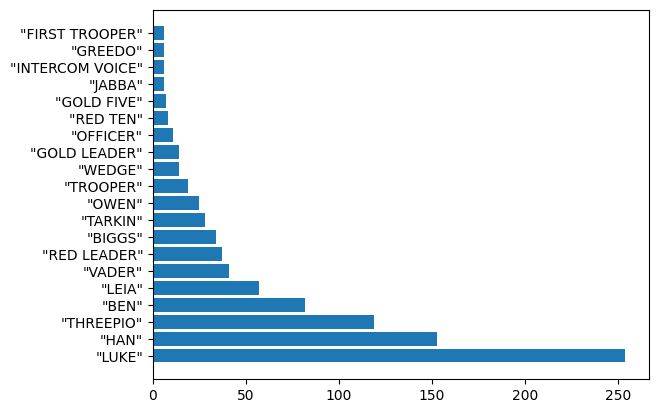

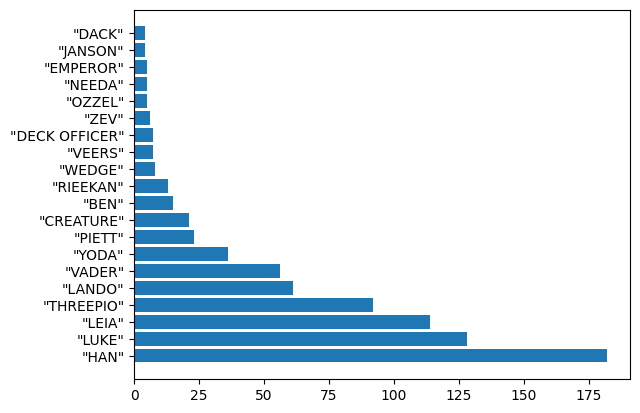

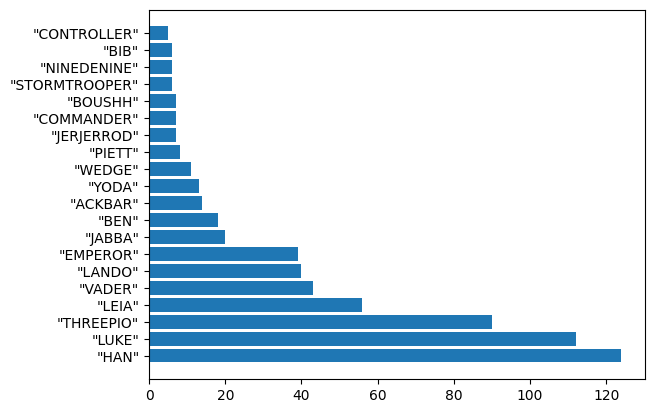

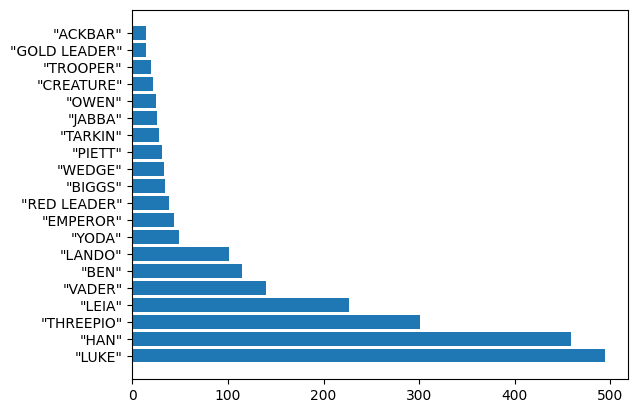

In [10]:
histogram("/t1_e4/part-00000")
histogram("/t1_e5/part-00000")
histogram("/t1_e6/part-00000")
histogram("/t1_all/part-00000")